In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv').replace(0, np.nan)
df[['Pregnancies', 'Outcome']] = df[['Pregnancies', 'Outcome']].replace(np.nan, 0)

#df = df.fillna(df.mean())
#df = df.loc[~np.any(df[used_cols].isnull(), axis = 1)]
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   
5          5.0    116.0           74.0            NaN      NaN  25.6   
6          3.0     78.0           50.0           32.0     88.0  31.0   
7         10.0    115.0            NaN            NaN      NaN  35.3   
8          2.0    197.0           70.0           45.0    543.0  30.5   
9          8.0    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      1.0  
1                     0.351   31      0.0  
2                     0.672   32      1.0  
3                     0.167   2

c:\users\alanv\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


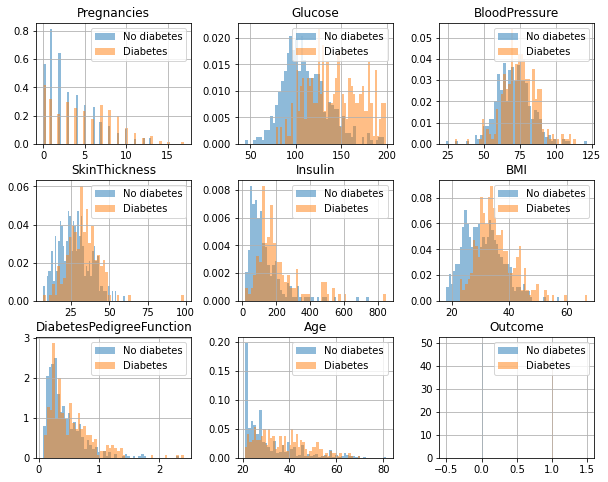

In [51]:
groups = df.groupby('Outcome')#[df.columns[df.columns != 'Outcome']]
axes = groups.get_group(0).hist(figsize = (10, 8), bins = 50, density = True, alpha = .5, label = 'No diabetes');
groups.get_group(1).hist(ax = axes.ravel(), bins = 50, density = True, alpha = .5, label = 'Diabetes');
for ax in axes.ravel(): ax.legend()

In [3]:
for col in df.columns[df.columns != 'Outcome']:
    print('\n\n' + col)
    print(grouped[col].describe()) 



Pregnancies
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0.0      500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1.0      268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


Glucose
         count        mean        std   min    25%    50%    75%    max
Outcome                                                                
0.0      500.0  110.643863  24.702314  44.0   93.0  107.5  125.0  197.0
1.0      268.0  142.319549  29.488132  78.0  119.0  140.5  167.0  199.0


BloodPressure
         count       mean        std   min   25%        50%   75%    max
Outcome                                                                 
0.0      500.0  70.877339  11.927450  24.0  63.5  70.877339  78.0  122.0
1.0      268.0  75.321429  11.925638  30.0  68.0  75.321429  82.0  114.0


SkinThickness
         count       mean       std  min   25%        50%   75%   max
Outcome                                       

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
SkinThickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
BMI,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


In [3]:
def gen_dataset(): return train_test_split(df, test_size = 0.2, shuffle = True)

In [150]:
class Method1:
    def __init__(self, *args, **kwargs):
        self.trained = False
        self.used_cols = np.empty(0)
    
    def train(self, train_set, outcome, grouped = None, smoothing = 1, n_groups = 15, used_cols = None):
        
        if not grouped: grouped = train_set.groupby(outcome)
        self.prioris = np.zeros(2)

        if used_cols is None: self.used_cols = train_set.columns
        else: self.used_cols = used_cols
            
        self.used_cols = self.used_cols[self.used_cols != outcome]
        
        self.probabilities = np.zeros((2, len(self.used_cols), n_groups))
        
        self.lims = np.zeros((2, n_groups, len(self.used_cols)))
        
        for group in map(int, grouped.groups.keys()):
            g = grouped.get_group(group)[self.used_cols].to_numpy()
            for i in range(len(self.used_cols)):
                gx = g[:, i]

                mini, maxi = gx.min(), gx.max()

                self.lims[group, :, i] = mini + (maxi - mini) / n_groups * np.arange(n_groups)
                
                gx = np.append(gx, np.tile(self.lims[group, :, i], smoothing))
                
                by_lims = (gx >= self.lims[group][:-1, [i]]) & (gx < self.lims[group][1:, [i]])

                self.probabilities[group, i, :-1] = np.mean(by_lims, axis = 1)

                self.probabilities[group, i, -1] = np.mean(gx >= self.lims[group, -1, i])
        
        
        self.prioris[1] = train_set[outcome].mean()
        self.prioris[0] = 1 - self.prioris[1]
        
        self.trained = True
        
    def _check_trained(self):
        if not self.trained: raise Exception('Cannot predict without training')

    def _predict(self, data : pd.Series) -> int:
        
        self._check_trained()
               
        #diab = nodiab = 1
        nodiab, diab = self.prioris
        
        for i, key in enumerate(data.keys()):
            if not np.isnan(data[key]):
                idx_diab = np.argwhere(self.lims[1, :, i] <= data[key])
                idx_diab = np.max(idx_diab) if len(idx_diab) else 0

                idx_nodiab = np.argwhere(self.lims[0, :, i] <= data[key])
                idx_nodiab = np.max(idx_nodiab) if len(idx_nodiab) else 0

                diab *= self.probabilities[1, i, idx_diab]
                nodiab *= self.probabilities[0, i, idx_nodiab]
            
        return int(nodiab < diab)

    def test(self, test_set : pd.DataFrame) -> pd.Series:
        return test_set[self.used_cols].apply(self._predict, axis = 1)

In [140]:
def parameters(targets_ok : np.array, pred_ok : np.array) -> list[float]:
    
    acc = np.mean(targets_ok == pred_ok)
    VP = np.sum(targets_ok & pred_ok)
    VN = np.sum(~targets_ok & ~pred_ok)
    FP = np.sum(~targets_ok & pred_ok)
    FN = np.sum(targets_ok & ~pred_ok)
    
    sensib = VP / (VP + FN) if VP or FN else 0
    specif = VN / (VN + FP) if VN or FP else 0
    vpredp = VP / (VP + FP) if VP or FP else 0
    vpredn = VN / (VN + FN) if VN or FN else 0
    
    return [acc, sensib, specif, vpredp, vpredn]

#used_cols = df.columns[list(map(lambda n: n not in ['SkinThickness', 'BloodPressure'], df.columns))]
used_cols = df.columns
def replace_nan(data, grouped_means):
    filled_0 = data[data['Outcome'] == 0].fillna(grouped_means.loc[1])
    filled_1 = data[data['Outcome'] == 1].fillna(grouped_means.loc[0])
    
    return filled_0.append(filled_1).reset_index(drop = True)
    
def newfillna(data, grouped_means):
    if not np.any(data.isna()): return data
    res = data.copy()
    if res['Glucose'] < 100: res = res.fillna(grouped_means.loc[0])
    elif res['Insulin'] > 135: res = res.fillna(grouped_means.loc[1])
    elif res['Age'] <= 22: res = res.fillna(grouped_means.loc[0])
    elif res['Glucose'] >= 160: res = res.fillna(grouped_means.loc[1])
    elif res['Insulin'] < 100: res = res.fillna(grouped_means.loc[0])
    elif res['BMI'] <= 24: res = res.fillna(grouped_means.loc[0])
    return res

def print_data(values):
    mean = lambda val: np.round(np.mean(val) * 100, 2) 
    print(f'\tAccuracy: {mean(values[:, 0])}%')
    print(f'\tSensib: {mean(values[:, 1])}%')
    print(f'\tSpecif: {mean(values[:, 2])}%')
    print(f'\tVpred_pos: {mean(values[:, 3])}%')
    print(f'\tVpred_neg: {mean(values[:, 4])}%')

In [105]:
def testing(n_groups, fillna, smoothing):
    reps = 100
    params_1 = np.zeros((reps, 5))
    
    method1 = Method1()
    for i in range(reps):
        train, test = gen_dataset()
        
        grouped_means = train.groupby('Outcome').mean()
        train = replace_nan(train, grouped_means)

        if fillna: test = test.fillna(train.mean())

        method1.train(train[used_cols], 'Outcome', smoothing = smoothing, n_groups = n_groups, used_cols = used_cols)

        pred_1 = method1.test(test)

        targets_ok = test['Outcome'] == 1
        pred_ok_1 = pred_1 == 1

        params_1[i] = parameters(targets_ok, pred_ok_1)

        
    return params_1.mean(axis = 0)
    
fillna = np.array([True, False])
n_groups = np.arange(1, 26)
smoothing = np.arange(3)

res = np.zeros((fillna.size, n_groups.size, smoothing.size, 5))
for i, f in enumerate(fillna):
    for j, n in enumerate(n_groups):
        for k, s in enumerate(smoothing):
            res[i, j, k] = testing(n, f, s)
        
        
print(np.round(res * 100, 2))        

[[[[ 65.07   0.   100.     0.    65.07]
   [ 65.08   0.   100.     0.    65.08]
   [ 66.24   0.   100.     0.    66.24]]

  [[ 65.93  49.75  74.63  51.1   73.86]
   [ 65.55  48.76  74.66  50.9   73.14]
   [ 65.79  49.95  74.62  52.38  72.95]]

  [[ 68.27  56.81  74.51  54.32  76.6 ]
   [ 68.78  57.23  74.83  54.63  77.09]
   [ 67.98  55.14  75.06  55.01  75.66]]

  [[ 69.72  65.59  71.98  56.94  79.68]
   [ 68.8   64.62  70.89  54.62  79.39]
   [ 69.34  66.05  71.22  55.81  79.67]]

  [[ 70.16  64.19  73.53  56.93  79.75]
   [ 70.54  62.86  74.78  57.52  79.39]
   [ 70.73  62.2   75.5   58.44  78.87]]

  [[ 71.56  53.38  81.29  60.8   76.75]
   [ 71.98  53.41  82.14  62.43  76.44]
   [ 72.24  52.62  82.55  61.84  77.  ]]

  [[ 72.56  55.95  81.33  61.47  78.18]
   [ 72.4   55.51  81.62  62.32  77.72]
   [ 71.35  54.56  80.37  60.35  77.21]]

  [[ 70.32  77.47  66.69  55.57  85.4 ]
   [ 70.97  75.79  68.35  57.05  84.35]
   [ 70.27  75.54  67.59  56.04  84.32]]

  [[ 70.92  71.97  70.43

n de 1 a 20

In [151]:
print('  Acc  Sens  Spec   VPP   VPN')
print(np.round(res[0, 7, 0] * 100, 2))

  Acc  Sens  Spec   VPP   VPN
[70.32 77.47 66.69 55.57 85.4 ]


n de 21 a 31

In [152]:
print('  Acc  Sens  Spec   VPP   VPN')
max_acc = res[res[:, :, :, 0] == np.max(res[:, :, :, 0])][0]
print(np.round(max_acc * 100, 2), 'Máxima accuracy')

max_sens = res[res[:, :, :, 1] == np.max(res[:, :, :, 1])][0]
print(np.round(max_sens * 100, 2), 'Máxima sensibilidad')

max_vpn = res[res[:, :, :, 4] == np.max(res[:, :, :, 4])][0]
print(np.round(max_vpn * 100, 2), 'Máximo VPN')


  Acc  Sens  Spec   VPP   VPN
[74.97 60.95 82.44 65.28 79.9 ] Máxima accuracy
[70.32 77.47 66.69 55.57 85.4 ] Máxima sensibilidad
[70.32 77.47 66.69 55.57 85.4 ] Máximo VPN


In [153]:
reps = 100
filler = True
method1 = Method1()
used_cols = df.columns[list(map(lambda n: n not in ['SkinThickness'], df.columns))]
#used_cols = df.columns
for i in range(reps):
        train, test = gen_dataset()
        train = train[~np.any(train.isna(), axis = 1)]
        #grouped_means = train.groupby('Outcome').mean()
        #train = replace_nan(train, grouped_means)

        if filler: test = test.fillna(train.mean())

        method1.train(train[used_cols], 'Outcome', smoothing = 0, n_groups = 8, used_cols = used_cols)

        pred_1 = method1.test(test)

        targets_ok = test['Outcome'] == 1
        pred_ok_1 = pred_1 == 1

        params_1[i] = parameters(targets_ok, pred_ok_1)

        
print(params_1.mean(axis = 0))

[0.7124026  0.67884402 0.73274233 0.58440215 0.80611455]


In [1]:
fillna2 = np.array([True])
n_groups2 = np.arange(5, 10)
smoothing2 = np.zeros(1, dtype = int)

used_cols = df.columns[list(map(lambda n: n not in ['SkinThickness', 'BloodPressure'], df.columns))]

res2 = np.zeros((fillna2.size, n_groups2.size, smoothing2.size, 5))
for i, f in enumerate(fillna2):
    for j, n in enumerate(n_groups2):
        for k, s in enumerate(smoothing2):
            res2[i, j, k] = testing(n, f, s)
        
        
print(np.round(res2 * 100, 2))  

print('  Acc  Sens  Spec   VPP   VPN')
max_acc = res2[res2[:, :, :, 0] == np.max(res2[:, :, :, 0])][0]
print(np.round(max_acc * 100, 2), 'Máxima accuracy')

max_sens = res2[res2[:, :, :, 1] == np.max(res2[:, :, :, 1])][0]
print(np.round(max_sens * 100, 2), 'Máxima sensibilidad')

max_vpn = res2[res2[:, :, :, 4] == np.max(res2[:, :, :, 4])][0]
print(np.round(max_vpn * 100, 2), 'Máximo VPN')

NameError: name 'np' is not defined